In [1]:

import pandas as pd
import numpy as np
import random

# Setting up the number of customers to simulate
num_customers = 5000

# Creating sample customer data with realistic features
np.random.seed(42)  # Keeping results consistent for reproducibility

data = {
    "Age": np.random.randint(18, 65, num_customers),
    "Loan_Amount": np.random.randint(10000, 50000, num_customers),
    "Income_Level": np.random.choice(
        ["Low", "Medium", "High"], num_customers, p=[0.4, 0.4, 0.2]
    ),
    "Income_Source": np.random.choice(
        ["Daily Wage", "Salary", "Small Business", "Pension", "Commission"],
        num_customers,
        p=[0.35, 0.4, 0.15, 0.05, 0.05],
    ),
}

df = pd.DataFrame(data)

# Defining a simple logic to simulate repayment behavior
# The idea is to assign higher default probabilities to lower-income and daily-wage customers
def get_default_status(row):
    if row["Income_Level"] == "Low" and row["Income_Source"] == "Daily Wage":
        return "Default" if random.random() < 0.4 else "Paid"
    elif row["Income_Level"] == "Low":
        return "Default" if random.random() < 0.25 else "Paid"
    elif row["Income_Level"] == "Medium":
        return "Default" if random.random() < 0.15 else "Paid"
    else:
        return "Default" if random.random() < 0.05 else "Paid"


# Applying the function to generate a 'Default_Status' column
df["Default_Status"] = df.apply(get_default_status, axis=1)

# Introducing a few missing values to make the dataset closer to real-world scenarios
df.loc[df.sample(frac=0.02).index, "Age"] = np.nan
df.loc[df.sample(frac=0.01).index, "Loan_Amount"] = np.nan

# Exporting the simulated dataset for analysis
df.to_csv("grambond_customers.csv", index=False)

print("Data has been generated and saved to 'grambond_customers.csv'")


Data has been generated and saved to 'grambond_customers.csv'


In [2]:
import pandas as pd

df = pd.read_csv("grambond_customers.csv")


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4900 non-null   float64
 1   Loan_Amount     4950 non-null   float64
 2   Income_Level    5000 non-null   object 
 3   Income_Source   5000 non-null   object 
 4   Default_Status  5000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 195.4+ KB
None


In [4]:
print(df.describe())

               Age   Loan_Amount
count  4900.000000   4950.000000
mean     41.218571  29941.562222
std      13.538277  11576.015117
min      18.000000  10002.000000
25%      30.000000  19969.750000
50%      41.000000  29879.000000
75%      53.000000  39900.500000
max      64.000000  49994.000000


In [5]:
df_cleaned = df.dropna()

In [6]:
df_cleaned = df_cleaned.drop_duplicates().copy()

In [7]:
df_cleaned['Income_Source'] = df_cleaned['Income_Source'].str.lower().str.strip()

In [8]:
df_cleaned['Age'] = df_cleaned['Age'].astype(int)

In [9]:
# To check if all ages fall within the expected range
invalid_ages = df_cleaned[(df_cleaned['Age'] < 18) | (df_cleaned['Age'] > 65)]

# Display invalid records, if any
if not invalid_ages.empty:
    print("Invalid age entries found:")
    print(invalid_ages)
else:
    print("All age values are within the valid range (18–65).")


All age values are within the valid range (18–65).


In [10]:
df_cleaned.isnull().sum()

Age               0
Loan_Amount       0
Income_Level      0
Income_Source     0
Default_Status    0
dtype: int64

In [11]:
df_cleaned.duplicated().sum()

0

In [12]:
df_cleaned.dtypes

Age                 int32
Loan_Amount       float64
Income_Level       object
Income_Source      object
Default_Status     object
dtype: object

In [13]:
df_cleaned['Income_Source'].unique()

array(['salary', 'small business', 'daily wage', 'commission', 'pension'],
      dtype=object)

In [14]:
df_cleaned.head(10)

,Age,Loan_Amount,Income_Level,Income_Source,Default_Status
0,56,20776.0,High,salary,Paid
1,46,42835.0,Medium,small business,Paid
2,32,19788.0,Low,daily wage,Default
3,60,15660.0,High,salary,Paid
4,25,14478.0,Low,salary,Default
5,38,18210.0,High,small business,Paid
6,56,20922.0,Medium,salary,Paid
7,36,46289.0,Medium,salary,Paid
8,40,43340.0,Medium,small business,Paid
9,28,49850.0,Low,salary,Paid


In [15]:
#  Data Cleaning 

# 1. Remove any rows with missing values
df_cleaned = df.dropna().copy()

# 2. Remove duplicate records, if any
df_cleaned = df_cleaned.drop_duplicates().copy()

# 3. Standardize text entries in 'Income_Source' column (lowercase and strip extra spaces)
df_cleaned["Income_Source"] = df_cleaned["Income_Source"].str.lower().str.strip()

# 4. Convert 'Age' column to integer type
df_cleaned["Age"] = df_cleaned["Age"].astype(int)

# 5. Validate that all ages are within a realistic range (18–65)
invalid_ages = df_cleaned[(df_cleaned["Age"] < 18) | (df_cleaned["Age"] > 65)]

if not invalid_ages.empty:
    print("Invalid age entries found. Replacing them with the median age.")
    median_age = df_cleaned["Age"].median()
    df_cleaned.loc[
        (df_cleaned["Age"] < 18) | (df_cleaned["Age"] > 65), "Age"
    ] = median_age
else:
    print("All age values are within the valid range (18–65).")


All age values are within the valid range (18–65).


In [16]:
#Creating charts for Univariate Analysis

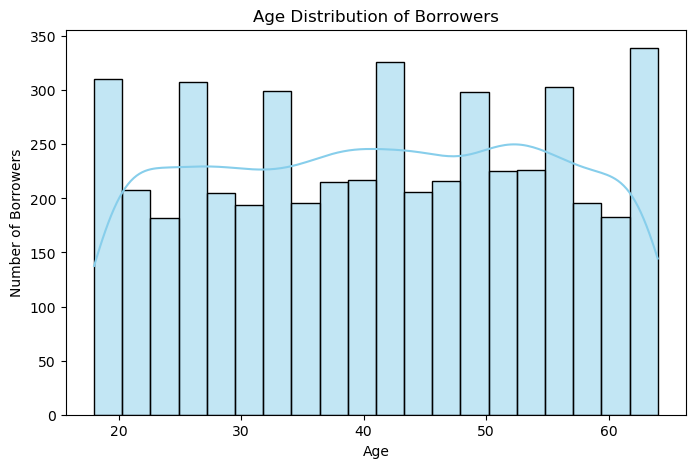

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Borrowers')
plt.xlabel('Age')
plt.ylabel('Number of Borrowers')
plt.show()

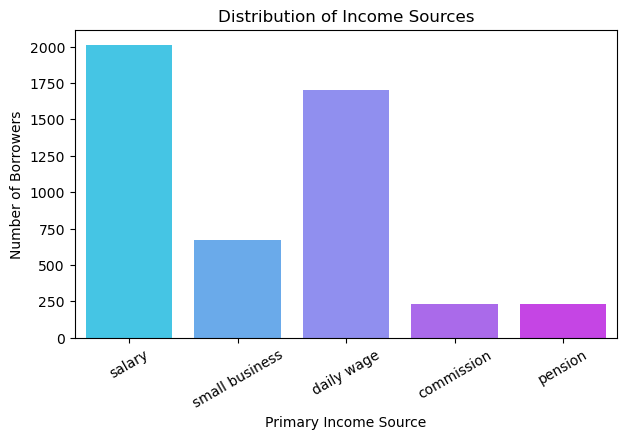

In [18]:
plt.figure(figsize=(7,4))
sns.countplot(x='Income_Source', data=df_cleaned, palette='cool')
plt.title('Distribution of Income Sources')
plt.xlabel('Primary Income Source')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=30)
plt.show()

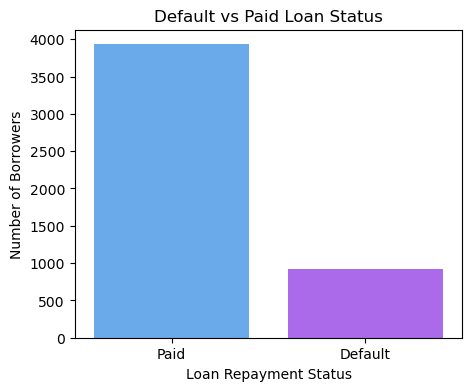

In [19]:
plt.figure(figsize=(5,4)) 
sns.countplot(x='Default_Status', data=df_cleaned, palette='cool') 
plt.title('Default vs Paid Loan Status') 
plt.xlabel('Loan Repayment Status')
plt.ylabel('Number of Borrowers') 
plt.show()

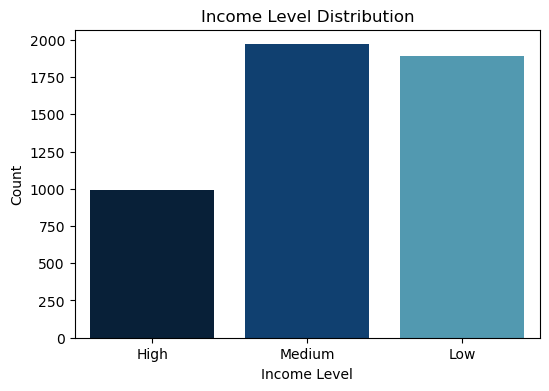

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Income_Level',data=df_cleaned,palette='ocean')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

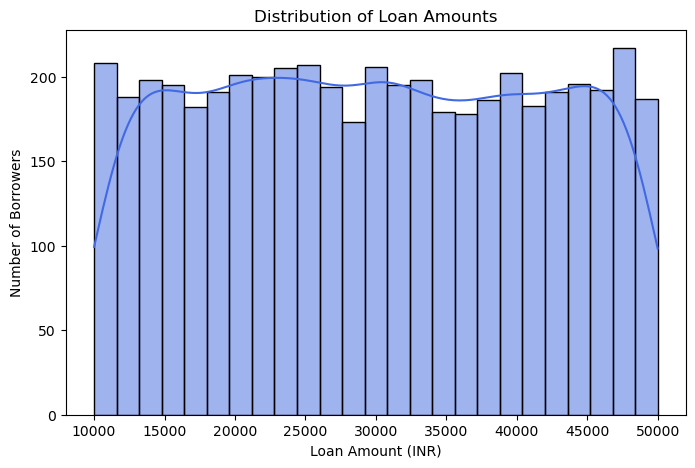

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Loan_Amount'], bins=25, kde=True, color='royalblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (INR)')
plt.ylabel('Number of Borrowers')
plt.show()

In [22]:
# Creating charts for Bivariate analysis

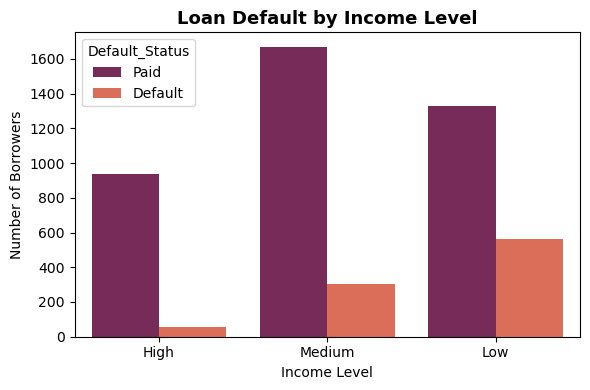

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x="Income_Level", hue="Default_Status", palette="rocket")
plt.title("Loan Default by Income Level", fontsize=13, weight="bold")
plt.xlabel("Income Level")
plt.ylabel("Number of Borrowers")
plt.tight_layout()
plt.show()

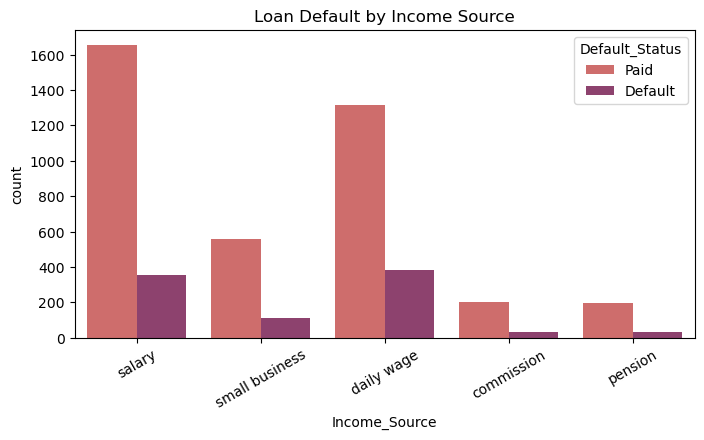

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_cleaned, x="Income_Source", hue="Default_Status", palette="flare")
plt.title("Loan Default by Income Source")
plt.xticks(rotation=30)
plt.show()


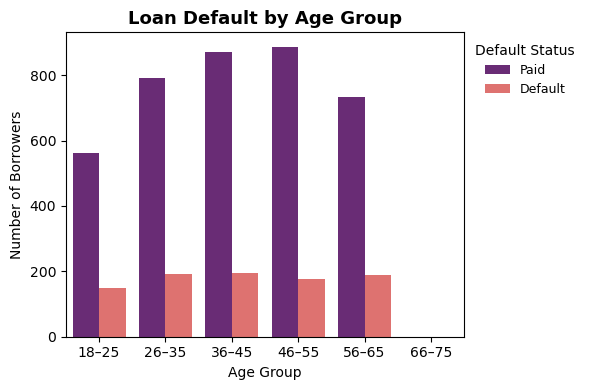

In [25]:
# Creating Age Group Bins
df_cleaned["Age_Group"] = pd.cut(
    df_cleaned["Age"],
    bins=[18, 25, 35, 45, 55, 65, 75],
    labels=["18–25", "26–35", "36–45", "46–55", "56–65", "66–75"],
)

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x="Age_Group", hue="Default_Status", palette="magma")

plt.title("Loan Default by Age Group", fontsize=13, weight="bold")
plt.xlabel("Age Group")
plt.ylabel("Number of Borrowers")

# Add legend
plt.legend(
    title="Default Status",
    frameon=False,  # removes box for a cleaner look
    fontsize=9,
    title_fontsize=10,
    loc="upper left",
    bbox_to_anchor=(1, 1),
)

plt.tight_layout()
plt.show()



In [ ]:
#Charts for multivariate analysis

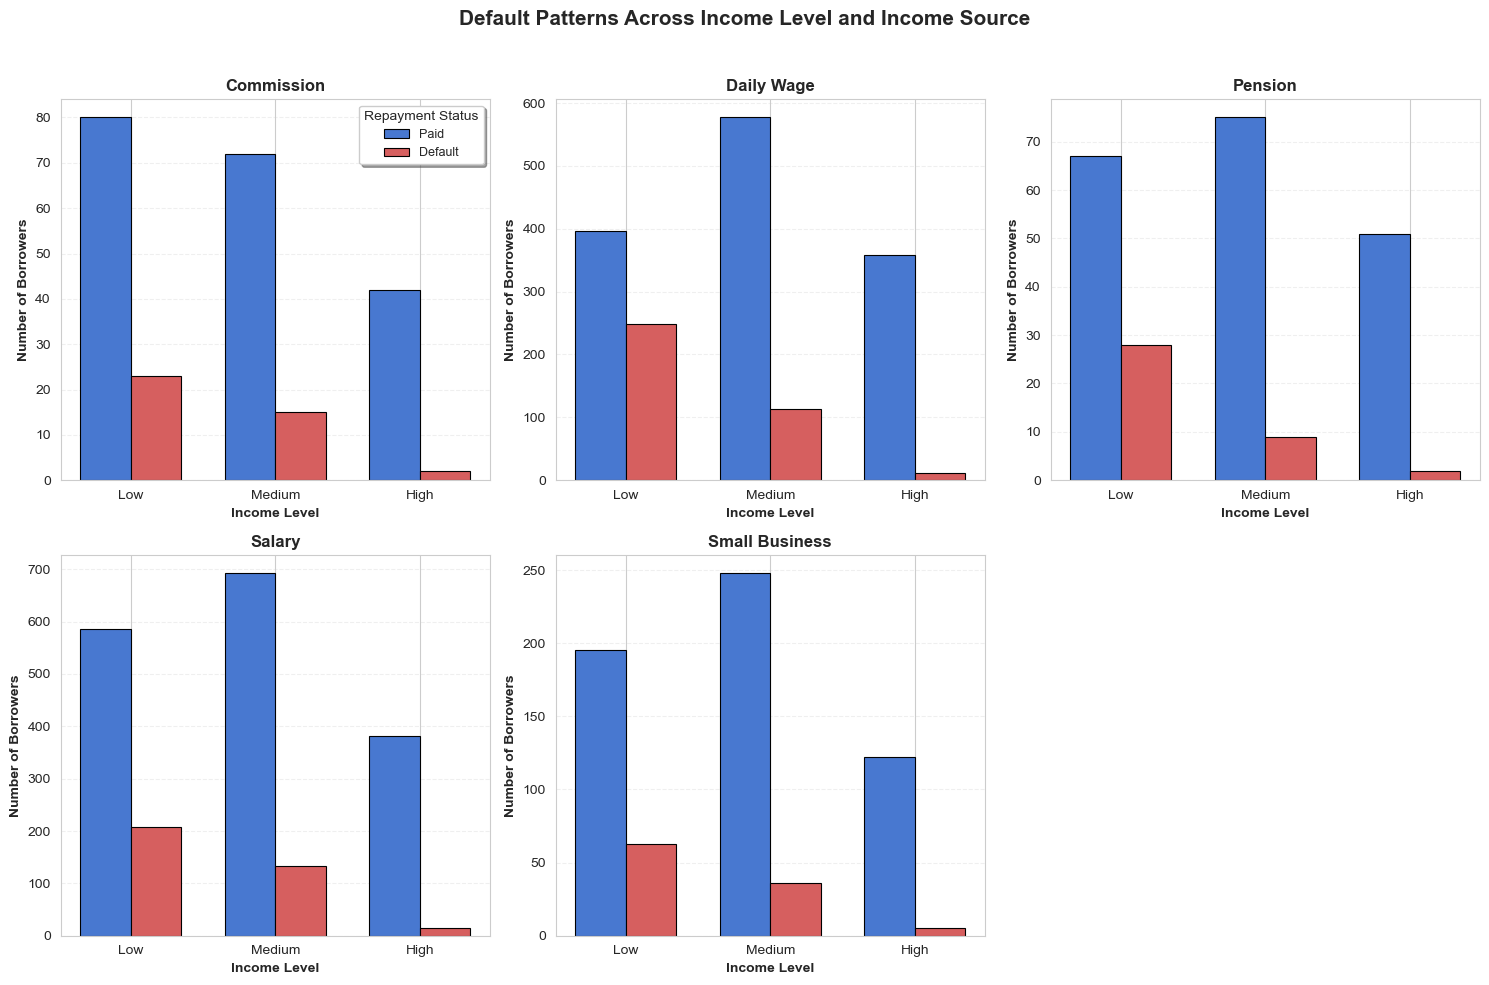

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Set up nice-looking plot style
sns.set_style("whitegrid")  # Adds a clean grid background

# Step 2: Define our categories in the right order
income_levels = ['Low', 'Medium', 'High']  # This ensures all three always show up
income_sources = ['commission', 'daily wage', 'pension', 'salary', 'small business']  # All job types

# Step 3: Define colors for easy understanding

colors = sns.color_palette("muted")
color_paid = colors[0]      # Soft blue
color_default = colors[3]   # Soft red


# Step 4: Create a big figure with 6 boxes (2 rows, 3 columns)
# We have 5 income sources, so one box will stay empty
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns, size 15x10 inches
axes = axes.flatten()  # This makes it easier to work with the boxes

# Step 5: Create one chart for each income source
for i, source in enumerate(income_sources):
    
    # Get the current box to draw in
    ax = axes[i]
    
    # Filter data: only get rows for this specific income source
    source_data = df_cleaned[df_cleaned['Income_Source'] == source]
    
    # Count how many people in each category
    # Group by income level and default status, then count them
    counts = source_data.groupby(['Income_Level', 'Default_Status']).size().reset_index(name='Count')
    
    # Rearrange data for easier plotting
    counts_wide = counts.pivot(index='Income_Level', columns='Default_Status', values='Count')
    
    # Make sure all income levels exist (even if count is 0)
    for level in income_levels:
        if level not in counts_wide.index:
            counts_wide.loc[level] = 0  # Add missing level with 0 count
    
    # Put them in the right order
    counts_wide = counts_wide.reindex(income_levels)
    
    # Replace any missing values with 0
    counts_wide = counts_wide.fillna(0)
    
    # Make sure we have both Paid and Default columns
    if 'Paid' not in counts_wide.columns:
        counts_wide['Paid'] = 0
    if 'Default' not in counts_wide.columns:
        counts_wide['Default'] = 0
    
    # Step 6: Draw the bars
    x_positions = [0, 1, 2]  # Position for Low, Medium, High
    bar_width = 0.35  # How wide each bar should be
    
    # Draw green bars for "Paid"
    ax.bar([pos - bar_width/2 for pos in x_positions],  # Shift left a bit
           counts_wide['Paid'], 
           bar_width, 
           label='Paid', 
           color=color_paid,
           edgecolor='black',  # Black border around bars
           linewidth=0.8)
    
    # Draw red bars for "Default"
    ax.bar([pos + bar_width/2 for pos in x_positions],  # Shift right a bit
           counts_wide['Default'], 
           bar_width, 
           label='Default', 
           color=color_default,
           edgecolor='black',
           linewidth=0.8)
    
    # Step 7: Add labels and make it look nice
    ax.set_title(source.title(), fontsize=12, fontweight='bold')  # Title for each chart
    ax.set_xlabel('Income Level', fontsize=10, fontweight='bold')  # X-axis label
    ax.set_ylabel('Number of Borrowers', fontsize=10, fontweight='bold')  # Y-axis label
    
    # Set x-axis to show Low, Medium, High
    ax.set_xticks(x_positions)
    ax.set_xticklabels(income_levels, fontsize=10)
    
    # Add light grid lines for easier reading
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)  # Put grid behind the bars
    
    # Add legend (the color key) only to the first chart
    if i == 0:
        ax.legend(title='Repayment Status', 
                 loc='upper right', 
                 fontsize=9,
                 frameon=True,  # Put a box around legend
                 shadow=True)   # Add a subtle shadow

# Step 8: Remove the extra empty box (we only have 5 income sources, not 6)
fig.delaxes(axes[5])

# Step 9: Add a main title at the top
fig.suptitle('Default Patterns Across Income Level and Income Source', 
             fontsize=15, 
             fontweight='bold',
             y=0.98)  # Position near top

# Step 10: Adjust spacing so everything fits nicely
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave room for main title

# Step 11: Save the chart as a high-quality image
plt.savefig('income_default_analysis.png', 
            dpi=300,  # High resolution
            bbox_inches='tight',  # Don't cut off anything
            facecolor='white')  # White background

# Step 12: Show the chart on screen
plt.show()



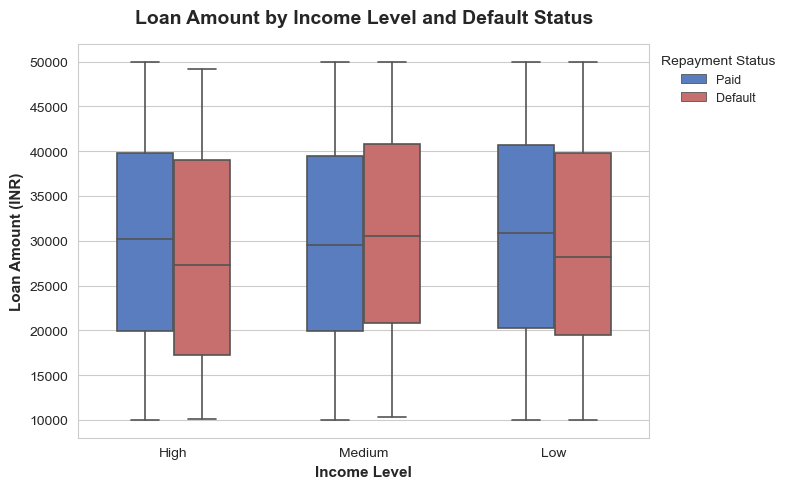

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick soft colors from muted palette
colors = sns.color_palette("muted")
color_paid = colors[0]  # Soft blue
color_default = colors[3]  # Soft red

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.boxplot(
    data=df_cleaned,
    x="Income_Level",
    y="Loan_Amount",
    hue="Default_Status",
    palette=[color_paid, color_default],  # Apply custom soft colors
    linewidth=1.2,
    width=0.6,
)

# Title and axis labels
plt.title(
    "Loan Amount by Income Level and Default Status", fontsize=14, weight="bold", pad=15
)
plt.xlabel("Income Level", fontsize=11, weight="bold")
plt.ylabel("Loan Amount (INR)", fontsize=11, weight="bold")

# Adjust legend
plt.legend(
    title="Repayment Status",
    frameon=False,  # removes box for a cleaner look
    fontsize=9,
    title_fontsize=10,
    loc="upper left",
    bbox_to_anchor=(1,1)
)

# Tidy up the layout and show
plt.tight_layout()
plt.show()
